In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)

In [3]:
df = pd.read_csv('deltastemr2.csv')

In [4]:
validcomp = df.names

In [6]:
# get the industry category for each company
compind = dict.fromkeys(linkedin.industry.unique(), 0)
for c in validcomp:
    k = linkedin[linkedin.company_name == c].iloc[0].industry
    compind[k] += 1

In [7]:
compind = pd.Series(compind)
compind = compind[compind>0]
compind = compind/compind.sum()

In [8]:
compind.name = 'allcompfreq'

In [22]:
highr2 = df[df['r2']>0.5].names
highr2 = list(highr2)
len(highr2)

13

In [23]:
ind = []
for i in range(len(highr2)):
    ind.extend(list(linkedin[linkedin.company_name==highr2[i]].industry.unique()))

In [24]:
highr2counts = pd.Series(ind).value_counts(normalize=True)

In [25]:
indfreq = pd.DataFrame(highr2counts, columns=['r2freq'])
indfreq = indfreq.join(compind)

In [26]:
indfreq.index

Index(['Financial Services', 'Biotechnology', 'Pharmaceuticals',
       'Venture Capital & Private Equity', 'Utilities', 'Computer Software',
       'Renewables & Environment', 'Medical Devices', 'Wireless', 'Internet',
       'Renewables &amp; Environment', 'Retail'],
      dtype='object')

# Frequency of industries in the high correlation group compared to the overall industry frequency

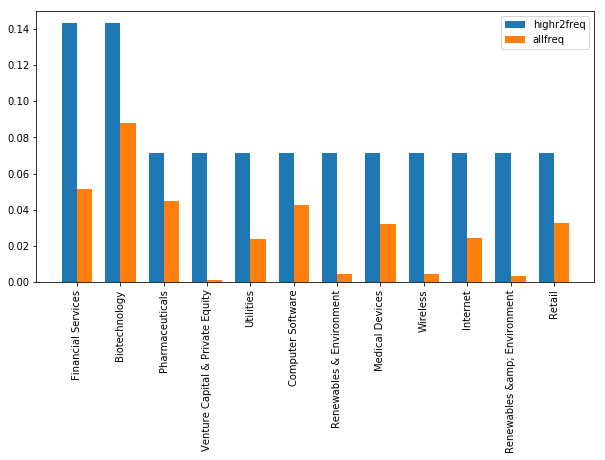

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(indfreq.shape[0])
width = .35
p1 = plt.bar(ind, indfreq.r2freq, width)
p2 = plt.bar(ind+width, indfreq.allcompfreq, width)
ax.legend((p1[0], p2[0]), ('highr2freq', 'allfreq'))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(indfreq.index)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
lowr2 = df[df['r2']<0.00001].names
lowr2 = list(lowr2)
len(lowr2)

16

In [29]:
lowind = []
for i in range(len(lowr2)):
    lowind.extend(list(linkedin[linkedin.company_name==lowr2[i]].industry.unique()))

In [30]:
lowr2counts = pd.Series(lowind).value_counts(normalize=True)
# pd.DataFrame(highr2counts, columns=['r2freq'])
lowfreq = pd.DataFrame(lowr2counts, columns=['r2freq'])

In [31]:
lowfreq = lowfreq.join(compind)

# Frequency of industries in the low correlation group compared to the overall industry frequency

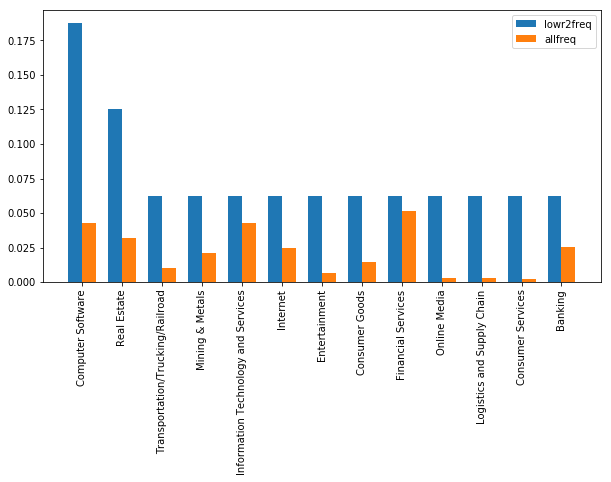

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(lowfreq.shape[0])
width = .35
p1 = plt.bar(ind, lowfreq.r2freq, width)
p2 = plt.bar(ind+width, lowfreq.allcompfreq, width)
ax.legend((p1[0], p2[0]), ('lowr2freq', 'allfreq'))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(lowfreq.index)
plt.xticks(rotation='vertical')
plt.show()